In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression


In [66]:
data = pd.read_csv('D:/Python_Projects/Regression/CarPrice.csv')
data.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,cylindernumber,enginesize,stroke,horsepower,price
0,alfa-romero giulia,2,1,2,1,2,4,130,2.68,111,13495.0
1,alfa-romero stelvio,2,1,2,1,2,4,130,2.68,111,16500.0
2,alfa-romero Quadrifoglio,2,1,2,3,2,3,152,3.47,154,16500.0
3,audi 100 ls,2,1,4,4,1,4,109,3.40,102,13950.0
4,audi 100ls,2,1,4,4,4,5,136,3.40,115,17450.0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CarName         205 non-null    object 
 1   fueltype        205 non-null    int64  
 2   aspiration      205 non-null    int64  
 3   doornumber      205 non-null    int64  
 4   carbody         205 non-null    int64  
 5   drivewheel      205 non-null    int64  
 6   cylindernumber  205 non-null    int64  
 7   enginesize      205 non-null    int64  
 8   stroke          205 non-null    float64
 9   horsepower      205 non-null    int64  
 10  price           205 non-null    float64
dtypes: float64(2), int64(8), object(1)
memory usage: 17.7+ KB


C:\Users\sneda\AppData\Local\Temp\ipykernel_6416\602412265.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot: >

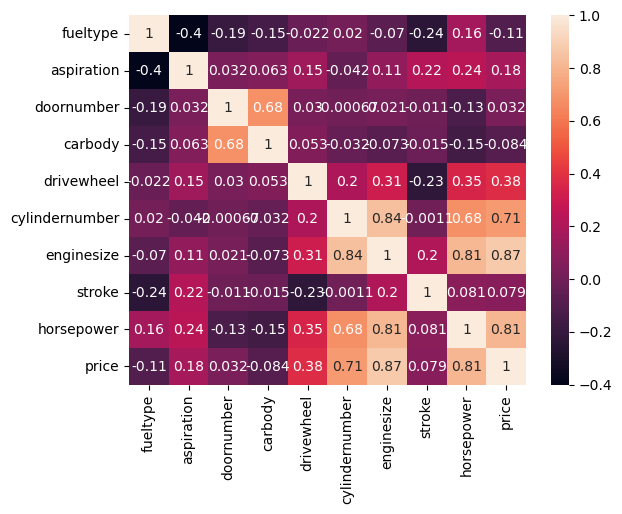

In [68]:
# Let's choose the features
sns.heatmap(data.corr(), annot=True)

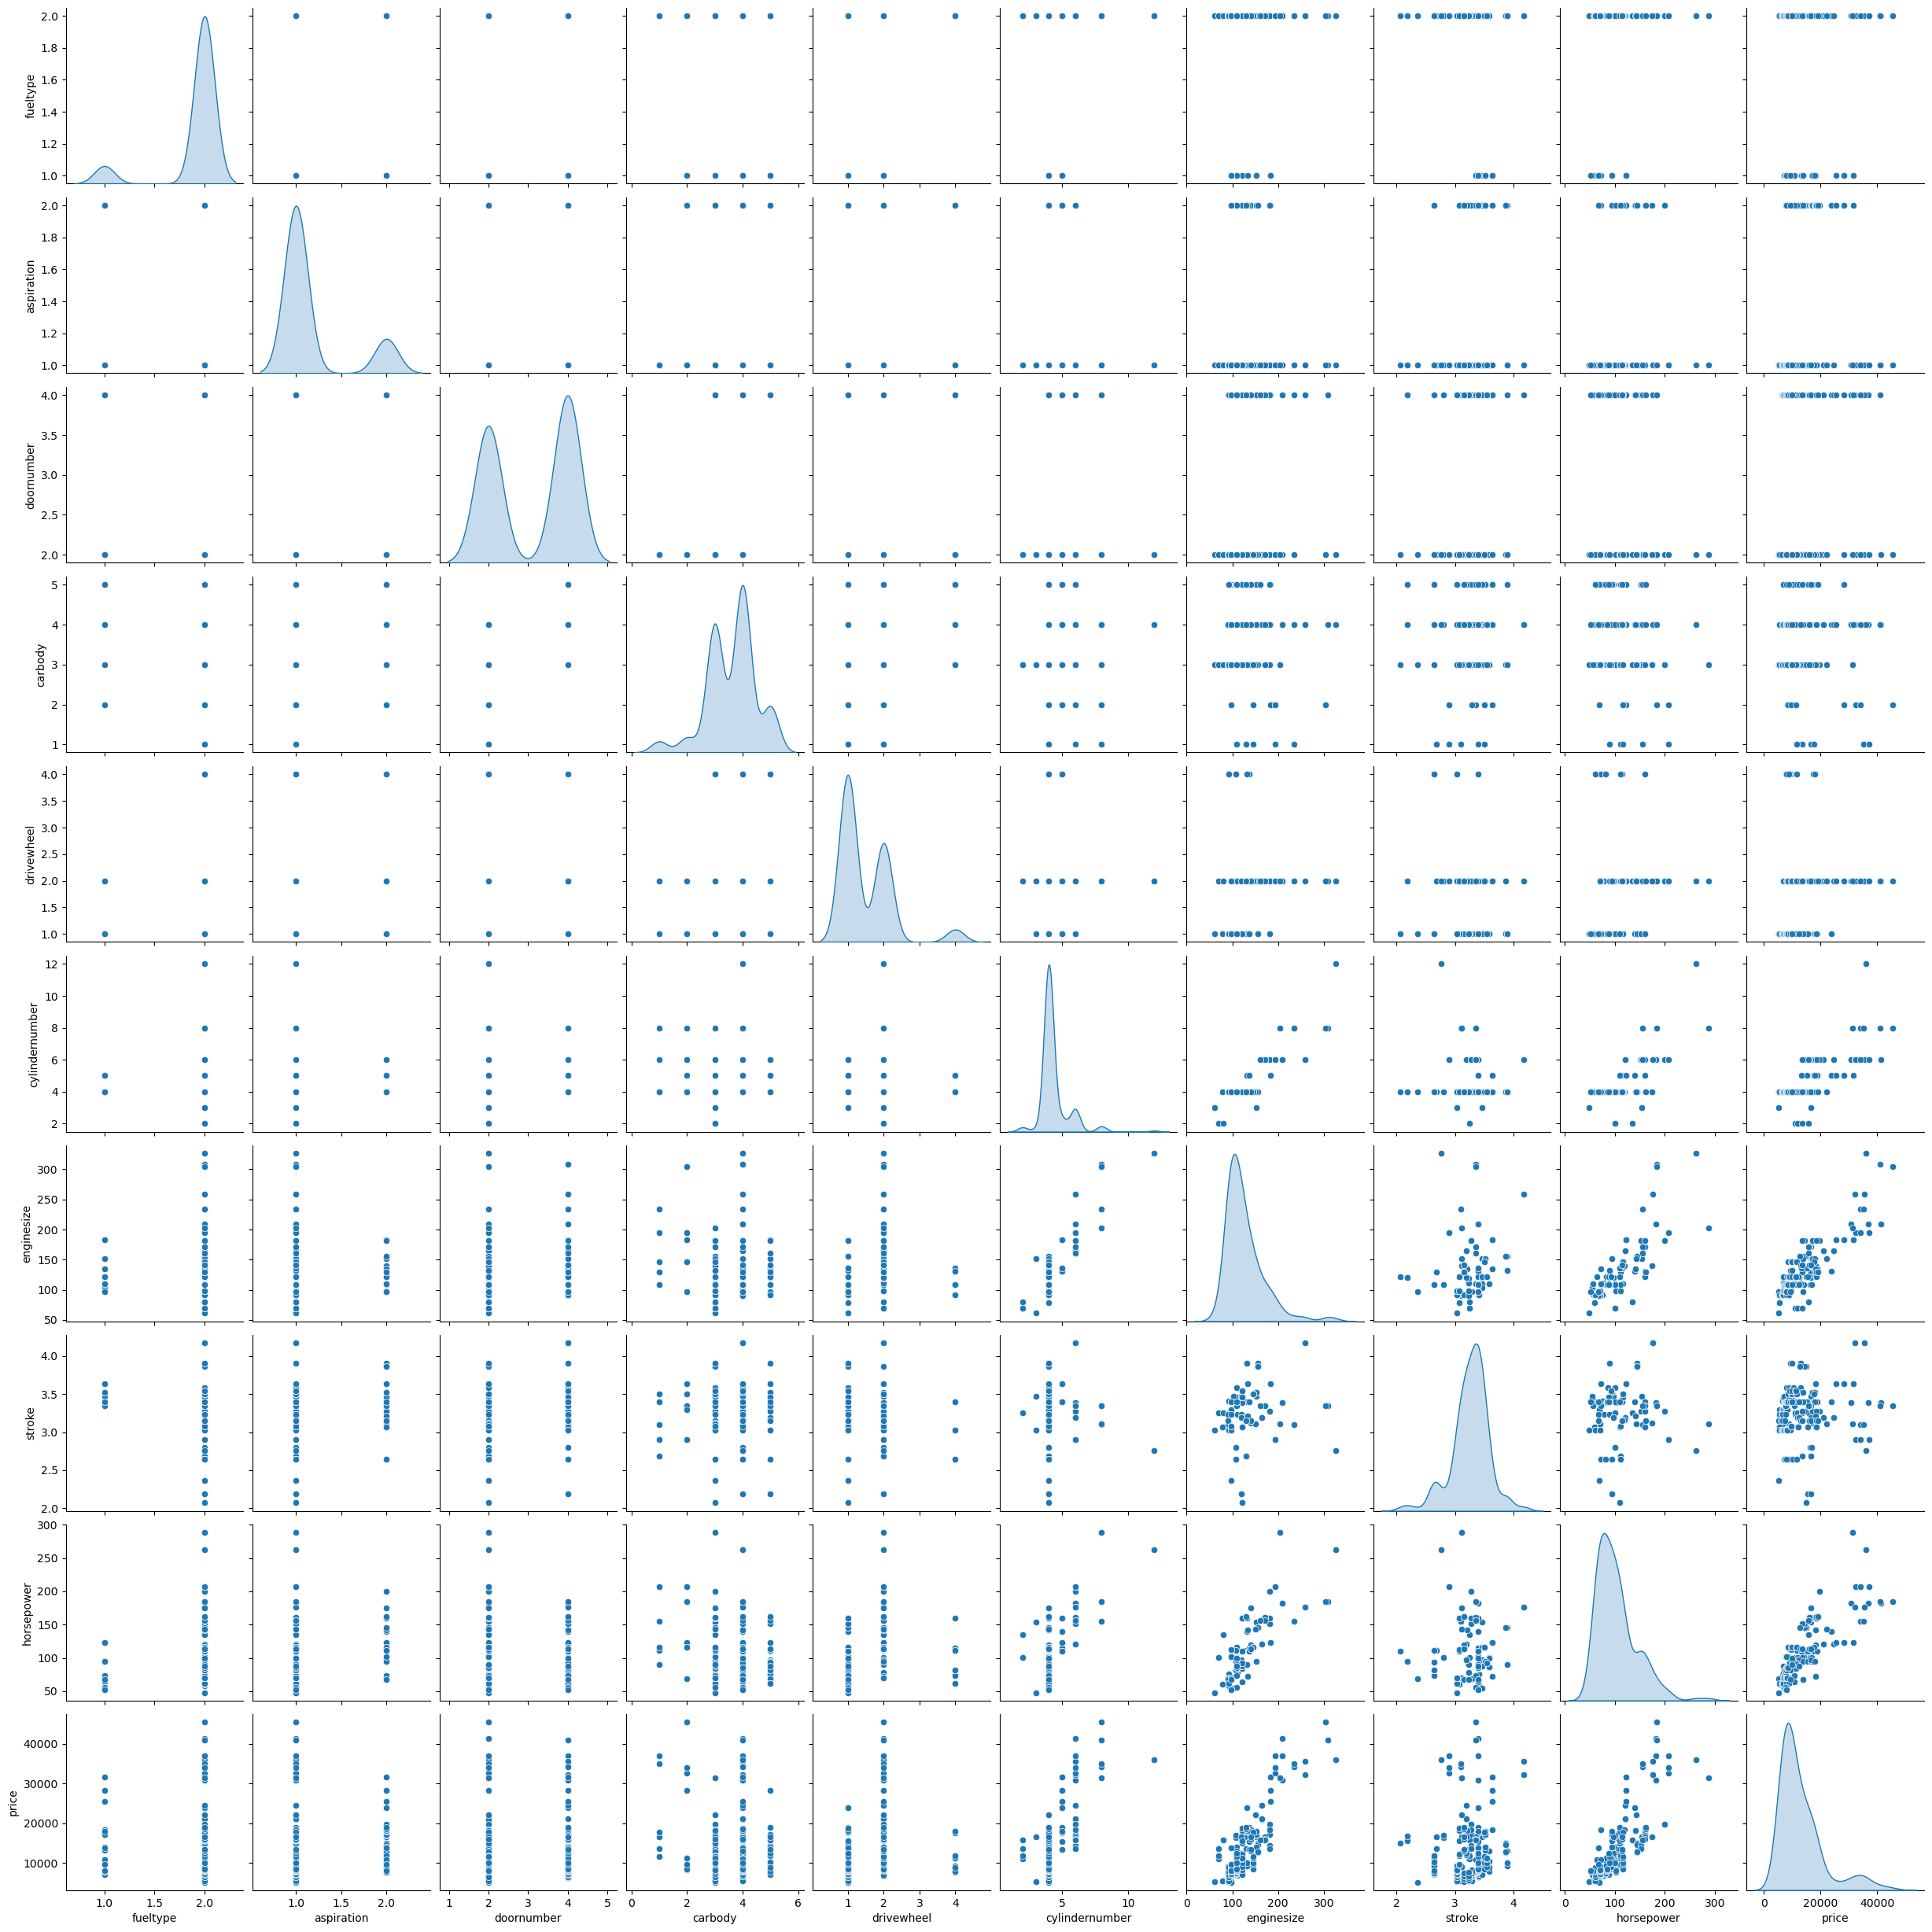

In [69]:
sns.pairplot(data.head(200), diag_kind='kde')

In [70]:
# Let's compose dataset

X=data.drop(['price', 'CarName'], axis=1)
y=data['price']

X.shape, y.shape

((205, 9), (205,))

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [72]:
# Linear Regression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [73]:
model.coef_

array([-4430.47226993,  -796.31559633,  1072.51451749, -1078.27948541,
         874.04439659,   -67.87639426,    90.63202124, -1391.79842664,
          90.49886014])

In [74]:
pd.DataFrame(model.coef_, X_train.columns)

,0
fueltype,-4430.472270
aspiration,-796.315596
doornumber,1072.514517
carbody,-1078.279485
drivewheel,874.044397
cylindernumber,-67.876394
enginesize,90.632021
stroke,-1391.798427
horsepower,90.498860


In [77]:
# Models evaluation

y_pred = model.predict(X_test)

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)

MAE

2878.0112889217467

In [78]:
MSE

16516988.073210472

In [79]:
data['price'].mean()

13276.710570731706

In [80]:
MAE / y_train.mean()

0.21631395965542163